In [1]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/Colab\ Notebooks/ExpDesign

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/ExpDesign


In [73]:
import pandas as pd
import numpy as np
#import statsmodels.api as sm

from sklearn.metrics import confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar

import statsmodels
statsmodels.__version__

'0.14.4'

In [75]:
y_test_true  = pd.read_csv('./data/processed/test_set.csv')['sensitive']#.to_numpy()
y_test_predicted_logreg  = pd.read_csv('./data/processed/prediction_LR.csv')["0"]#.to_numpy()
y_test_predicted_distbert  = pd.read_csv('./data/processed/test_set_distilbert_predictions.csv')["prediction"]#.to_numpy()

y_test_predicted_OR = y_test_predicted_logreg | y_test_predicted_distbert

In [76]:
correct_LR = y_test_true==y_test_predicted_logreg
correct_DB = y_test_true==y_test_predicted_distbert
correct_OR = y_test_true==y_test_predicted_OR

In [61]:
confusion_matrix(y_test_true, y_test_predicted_logreg)

array([[13914,   268],
       [  946,  1012]])

In [81]:
confusion_matrix(y_test_true, y_test_predicted_distbert)

array([[13833,   349],
       [  609,  1349]])

In [82]:
confusion_matrix(y_test_true, y_test_predicted_OR)

array([[13669,   513],
       [  502,  1456]])

In [89]:
table_LR_DB = confusion_matrix(correct_LR, correct_DB)
table_LR_DB

array([[  606,   608],
       [  352, 14574]])

In [91]:
tst = mcnemar(table_LR_DB)
print(tst)

pvalue      1.2419058527845384e-16
statistic   352.0


In [90]:
table_LR_OR = confusion_matrix(correct_LR, correct_OR)
table_LR_OR

array([[  770,   444],
       [  245, 14681]])

In [94]:
tst = mcnemar(table_LR_OR)
print(tst)

pvalue      3.059360297598945e-14
statistic   245.0


In [93]:
table_DB_OR = confusion_matrix(correct_DB, correct_OR)
table_DB_OR

array([[  851,   107],
       [  164, 15018]])

In [95]:
tst = mcnemar(table_DB_OR)
print(tst)

pvalue      0.0006425440817231749
statistic   107.0


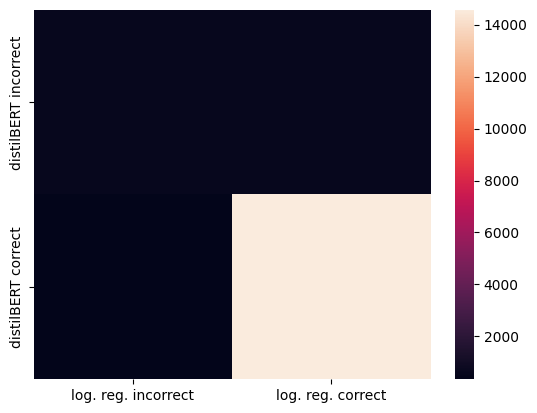

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

x_axis_labels = ["log. reg. incorrect", "log. reg. correct"]
y_axis_labels = ["distilBERT incorrect", "distilBERT correct"]

# create seabvorn heatmap with required labels
sns.heatmap(table, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

In [97]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test_true, y_test_predicted_OR)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_true, y_test_predicted_OR, average='binary')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.9371127633209417
Precision: 0.739461655662773
Recall: 0.7436159346271706
F1: 0.7415329768270945
